In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 22})

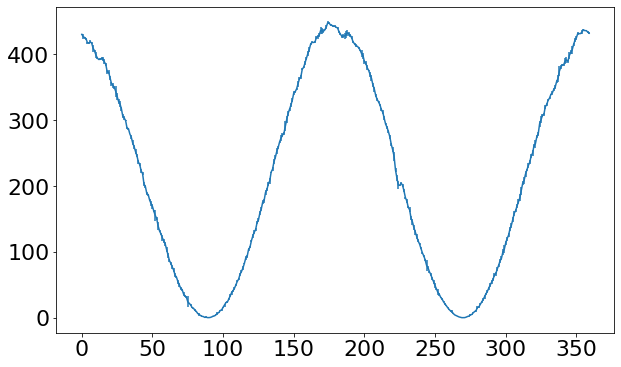

In [5]:
paths = ["../data/E_1_intensity_1700_run1.csv",
         "../data/E_1_intensity_1700_run2.csv",
         "../data/E_1_intensity_1700_run3.csv",
         "../data/E_1_intensity_1700_run4.csv",
         "../data/E_1_intensity_1700_run5.csv",
         "../data/E_1_intensity_2500_run1.csv",
         "../data/E_1_intensity_2500_run2.csv",
         "../data/E_1_intensity_2500_run3.csv",
         "../data/E_1_intensity_2500_run4.csv",
         "../data/E_1_intensity_2500_run5.csv",
        ]

data = np.zeros((len(paths), 360))
for i, path in enumerate(paths):
    data[i] = np.genfromtxt(path)

mean = np.mean(data, axis=0)
err = np.std(data, axis=0)
deg = np.linspace(0, 359, 360)

f = plt.figure(figsize=(10,6))
plt.errorbar(deg, mean, yerr= err)

plt.show()

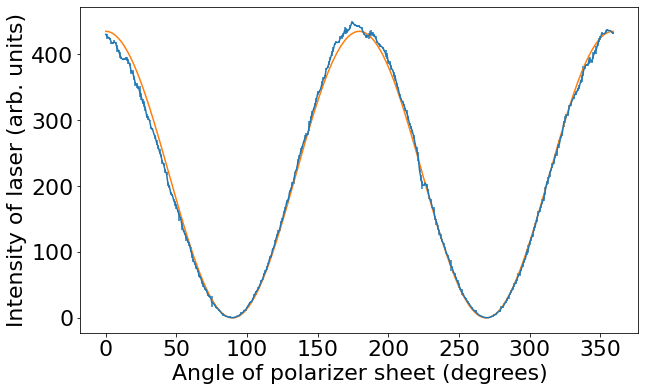

In [8]:
def cos_squared(x, A, k):
    return A*(np.cos(k*x*(2*np.pi)/360))**2

popt, pcov = curve_fit(cos_squared, xdata=deg, ydata=mean, sigma=err, p0=[800, 1])

f = plt.figure(figsize=(10,6))
plt.errorbar(deg, mean, yerr= err)
plt.plot(deg, cos_squared(deg, popt[0], popt[1]))
plt.ylabel("Intensity of laser (arb. units)")
plt.xlabel("Angle of polarizer sheet (degrees)")

plt.show()